# Калманов филтер - 2Д

Очекувано време за сработување: 2 дена по 8 часа.

## Референци

- [Веројатносна роботика, глава 3, до 3.3](https://e-kursevi.feit.ukim.edu.mk/mod/resource/view.php?id=12791)
- [Здружена веројатност - Википедија](https://en.wikipedia.org/wiki/Joint_probability_distribution)
- [Матрица на коваријанси - Википедија](https://en.wikipedia.org/wiki/Cross-covariance_matrix)
- [Модел за матрицата R, глава 6.3](https://e-kursevi.feit.ukim.edu.mk/pluginfile.php/77050/mod_resource/content/1/Yaakov%20Bar-Shalom%2C%20X.%20Rong%20Li%2C%20Thiagalingam%20Kirubarajan%20-%20Estimation%20with%20applications%20to%20tracking%20navigation-Wiley-Interscience%20%282001%29.pdf)


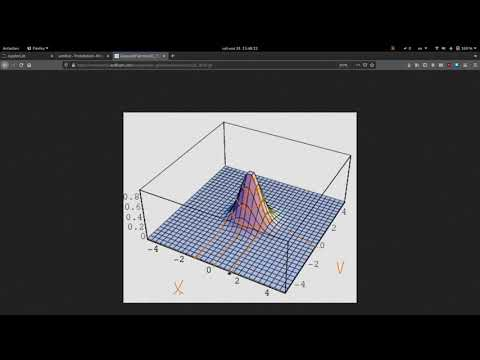

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('bhII7Z7JsnU')

In [2]:
from collections import namedtuple
import numpy as np
import sympy as sp
import plotly.graph_objs as go

In [2]:
class Robot():
    def __init__(self):
        self.position = 0

    def move(self, step_size=1, process_noise=.3):
        self.position += np.random.normal(step_size, process_noise)
        return self.position
    
    def sense(self, measurement_noise=.5):
        return np.random.normal(self.position, measurement_noise)
    
    def simulate(self, steps, step_size=1, process_noise=.3, measurement_noise=.5):
        """ Simulates robot movement for `steps` steps. """
        self.position = 0
        position_h, measurement_h = [], []
        for _ in range(steps):
            position_h.append(self.move(step_size, process_noise))
            measurement_h.append(self.sense(measurement_noise))
        return position_h, measurement_h

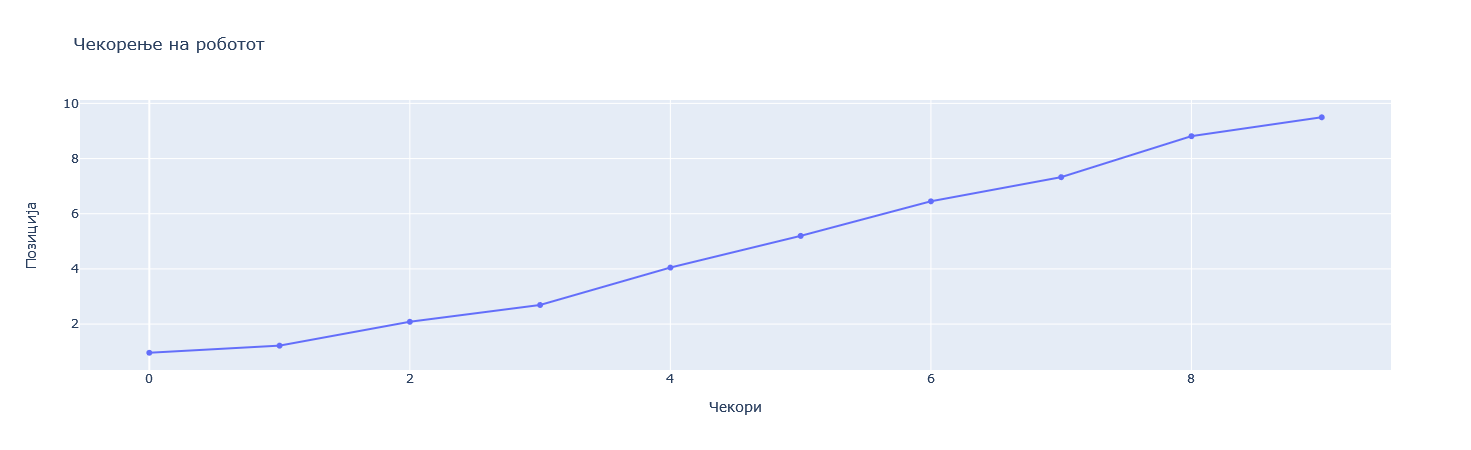

In [56]:
robot = Robot()
position_h, measurement_h = robot.simulate(steps=10)

fig = go.Figure(go.Scatter(y=measurement_h))
fig.update_layout(title='Чекорење на роботот', xaxis_title='Чекори', yaxis_title='Позиција')

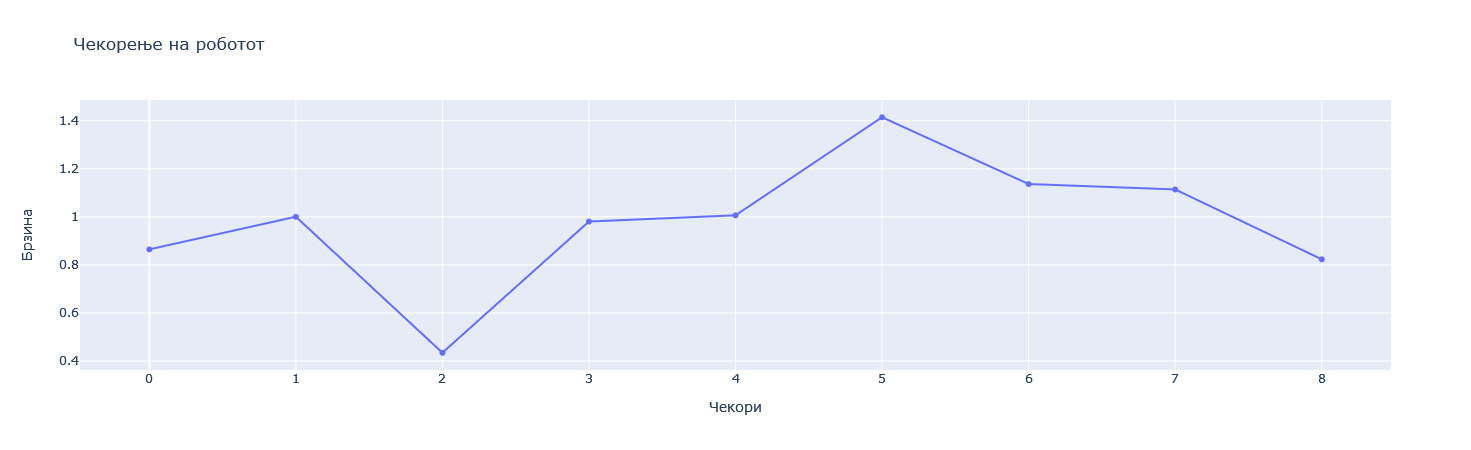

In [61]:
v = np.array(position_h[1:]) - np.array(position_h[:-1])
fig = go.Figure([go.Scatter(y=v)])
fig.update_layout(title='Чекорење на роботот', xaxis_title='Чекори', yaxis_title='Брзина')

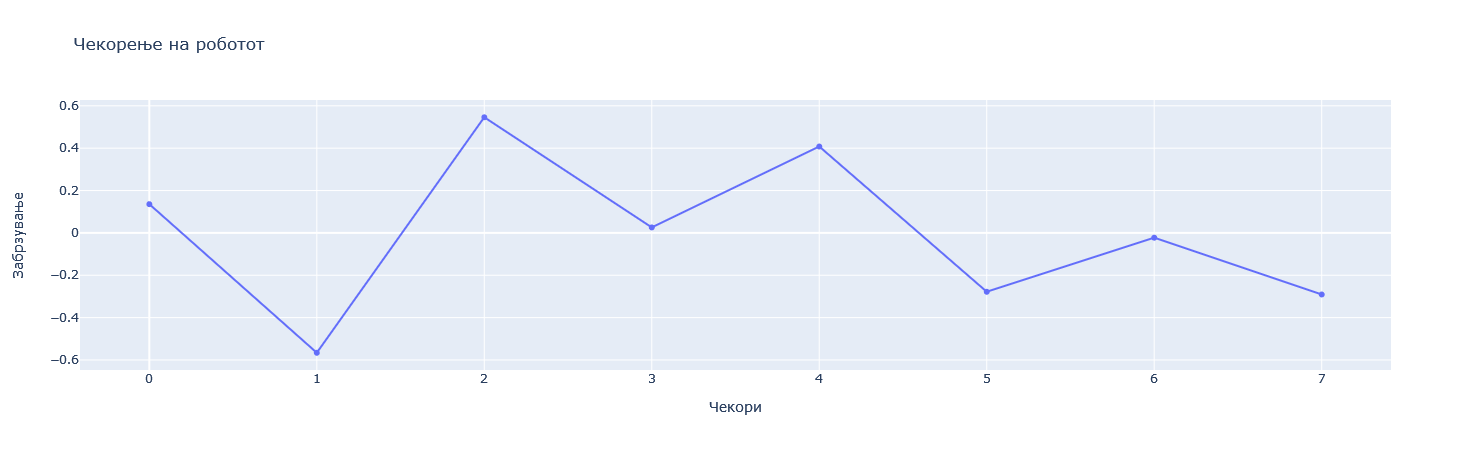

In [62]:
v = np.array(position_h[1:]) - np.array(position_h[:-1])
a = np.array(v[1:]) - np.array(v[:-1])
fig = go.Figure([go.Scatter(y=a)])
fig.update_layout(title='Чекорење на роботот', xaxis_title='Чекори', yaxis_title='Забрзување')

### Претставување на верувањето

In [4]:
Gaussian = namedtuple('Gaussian', ['m', 'S'])

In [5]:
def ellipse(g, stds=[1], color=0, N=300):
    def one_ellipse(std):
        R, s, _ = np.linalg.svd(np_S)
        t = np.linspace(0, 2*np.pi, N)
        x, y = R @ np.diag(std * np.sqrt(s)) @ [np.cos(t), np.sin(t)] + np_m
        return {'x': x, 'y': y}
    
    np_m = np.array(g.m).astype(np.float64)
    np_S = np.array(g.S).astype(np.float64)
    import plotly.express as px
    colors = px.colors.qualitative.Plotly
    ellipses = [go.Scatter(one_ellipse(std), line_color=colors[color], name=color) for std in stds]
    center = go.Scatter(x=np_m[0], y=np_m[1], 
                        mode='markers', marker_size=12, marker_symbol='x', 
                        line_color=colors[color], name=color)
    return ellipses + [center]

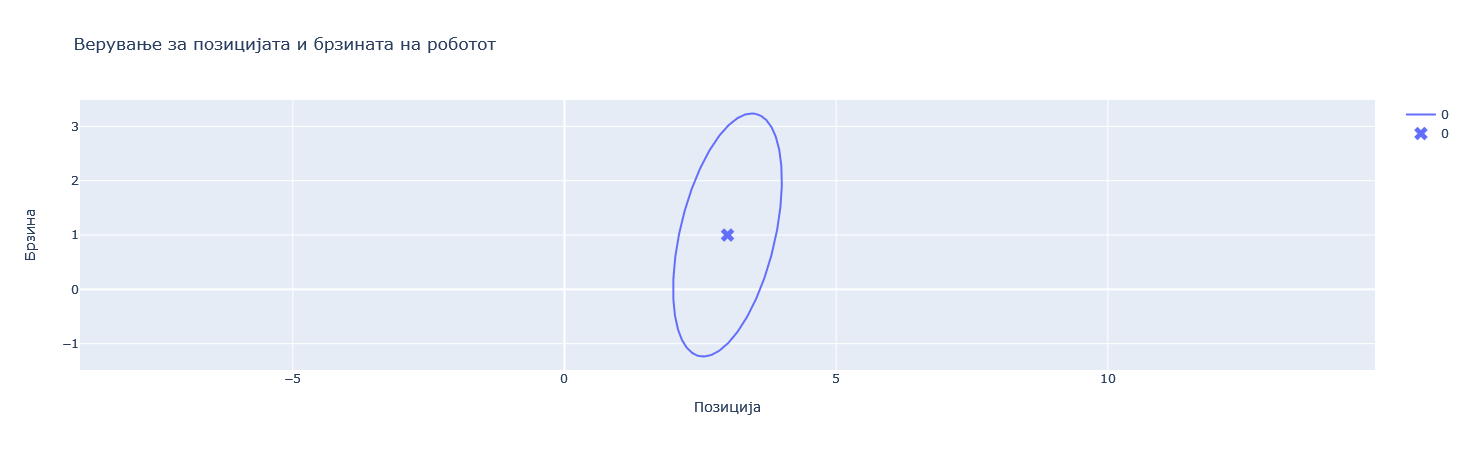

In [34]:
m = sp.Matrix([3, 1])
S = sp.Matrix([[1, 1], [1, 5]])
belief = Gaussian(m, S)
fig = go.Figure(data=ellipse(belief, stds=[1]))
fig.update_layout(
    title='Верување за позицијата и брзината на роботот', 
    xaxis_title='Позиција',
    yaxis_title='Брзина',
    yaxis_scaleanchor='x',
    yaxis_scaleratio=1
)

### Претставување на предвидувањето

In [17]:
def predict(belief, A, B, u, R):
    """ 
    Returns the predictions for the belief.
    
    Args:
        belief: belief
        A: state transition matrix
        B: control input matrix
        u: control input
        R: process noise matrix
    """
    return Gaussian(m, S)

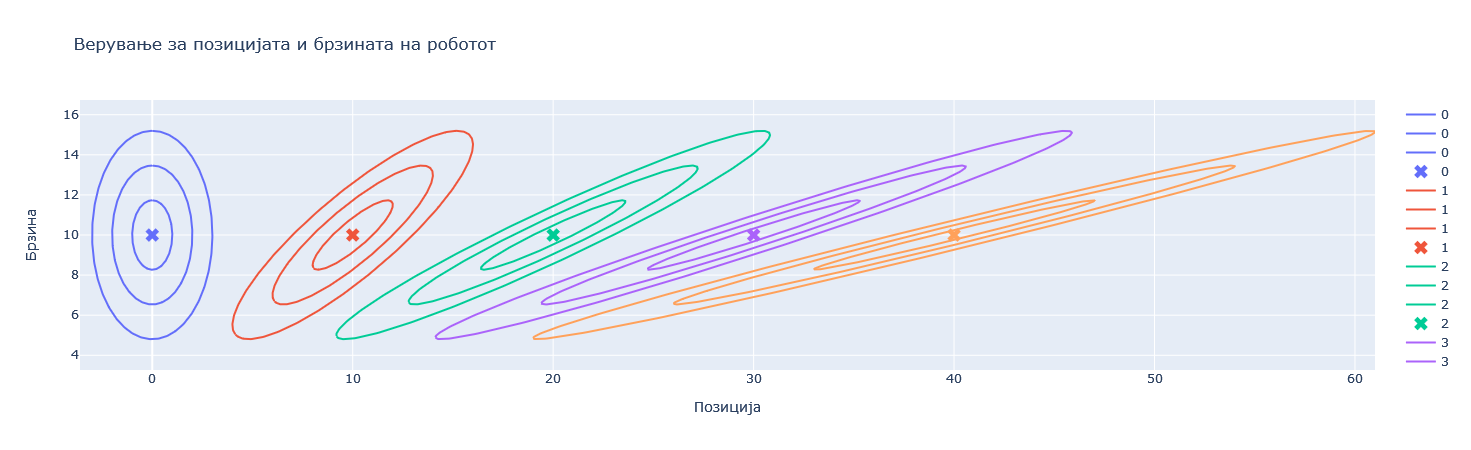

In [43]:
dt = 1
A = sp.Matrix([[1, dt], [0, 1]])
B = sp.Matrix([1, 0])
u = sp.Matrix([0])
R = sp.zeros(2)
m = sp.Matrix([0, 10])
S = sp.Matrix([[1, 0], [0, 3]])
belief = Gaussian(m, S)

stds = [1, 2, 3]
data_to_plot = ellipse(belief, stds=stds, color=0)
for i in range(1, 5):
    belief = predict(belief, A, B, u, R)
    data_to_plot += ellipse(belief, stds=stds, color=i)

fig = go.Figure(data=data_to_plot)
fig.update_layout(
    title='Верување за позицијата и брзината на роботот', 
    xaxis_title='Позиција',
    yaxis_title='Брзина',
    yaxis_scaleanchor='x',
    yaxis_scaleratio=1,
)

In [63]:
def process_noise(var, dt):
    G = sp.Matrix([[dt**2 / 2], [dt]])
    R = G * var * G.T
    return R

R = process_noise(var=0.5, dt=1)
R

Matrix([
[0.125, 0.25],
[ 0.25,  0.5]])

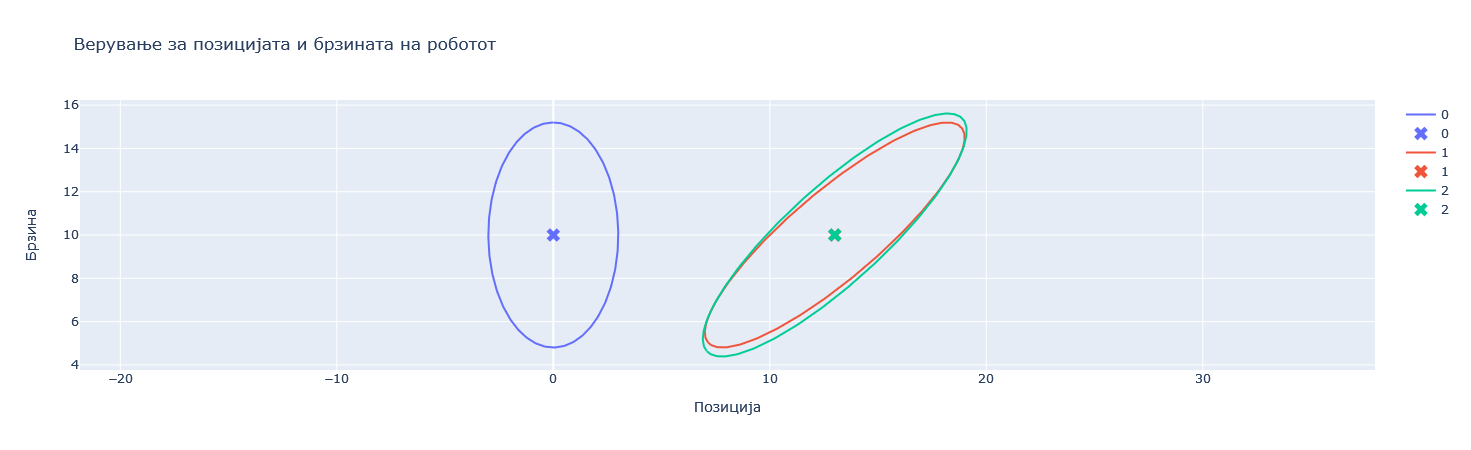

In [64]:
dt = 1
A = sp.Matrix([[1, dt], [0, 1]])
B = sp.Matrix([1, 0])
u = sp.Matrix([3])
m = sp.Matrix([0, 10])
S = sp.Matrix([[1, 0], [0, 3]])
belief = Gaussian(m, S)

stds = [3]
data_to_plot = ellipse(belief, stds=stds, color=0)

R = sp.zeros(2)
belief_1 = predict(belief, A, B, u, R)
data_to_plot += ellipse(belief_1, stds=stds, color=1)

R = process_noise(var=0.5, dt=1)
belief_2 = predict(belief, A, B, u, R)
data_to_plot += ellipse(belief_2, stds=stds, color=2)
    
fig = go.Figure(data=data_to_plot)
fig.update_layout(
    title='Верување за позицијата и брзината на роботот', 
    xaxis_title='Позиција',
    yaxis_title='Брзина',
    yaxis_scaleanchor='x',
    yaxis_scaleratio=1,
)

### Претставување на мерењето и обнова на верувањето

In [67]:
def update(belief, z, C, Q):
    """ 
    Returns the updated belief.
    
    Args:
        belief: belief
        z: measurement
        C: measurement matrix
        Q: measurement noise matrix
    """
    return Gaussian(m, S)

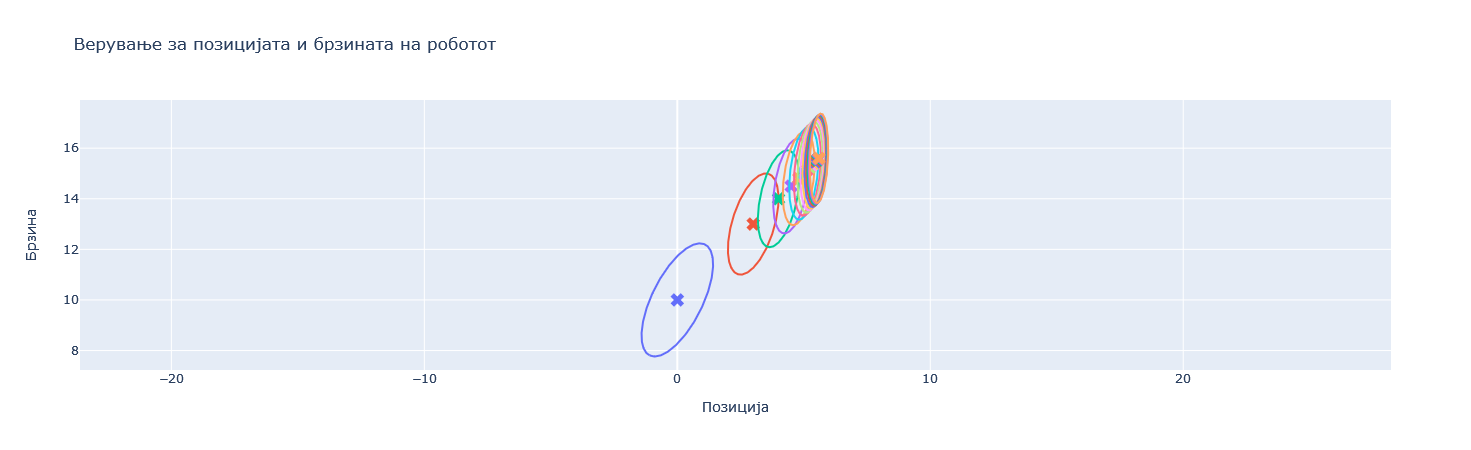

In [89]:
dt = 1
C = sp.Matrix([[1, 0]])
Q_var = 2
Q = sp.Matrix([[Q_var]])

stds = [1]
m = sp.Matrix([0, 10])
S = sp.Matrix([[2, 2], [2, 5]])
belief = Gaussian(m, S)
data_to_plot = ellipse(belief, stds=stds, color=0)
z = sp.Matrix([6])
for i in range(1, 15):
    belief = update(belief, z, C, Q)
    data_to_plot += ellipse(belief, stds=stds, color=i%10)

fig = go.Figure(data=data_to_plot)
fig.update_layout(
    title='Верување за позицијата и брзината на роботот', 
    xaxis_title='Позиција',
    yaxis_title='Брзина',
    yaxis_scaleanchor='x',
    yaxis_scaleratio=1,
    showlegend=False
)

## Задачи на кои треба да одговорите

1. Имплементирајте ја функцијата `predict()`.
1. Имплементирајте ја функцијата `update()`.
1. Искористете ги податоците `measurement_h` и функцијата `run_kalman_filter()` и дизајнирајте два филтри.
    1. Првиот филтер нека биде еднодимензионален, како во претходната задача `04_Калман_филтер_1д`, но да биде дизајниран според обопштените равенки.
    1. Вториот филтер нека биде дводимензионален така што сега брзината ќе биде дел од состојбениот вектор.
1. Направете споредба помеѓу двата филтри и покажете пример каде вториот филтер е подобар од првиот во следењето на роботот.
1. На нов график исцртајте ја брзината од состојбениот вектор на вториот филтер.
1. На нов график исцртајте ја неодреденоста (вредноста на секој член) од матрицата $\Sigma$ на верувањето.
1. Испитајте го поведението на филтрите при погрешна претпоставка за почетната позиција и брзина.
1. Испитајте ја поврзаноста на матриците `Q` и `R` и нивното влијание врз филтрите.
1. Испитајте го поведението на филтрите ако на влез се земат мерења - вештачки податоци, како што е прикажано во видеото.

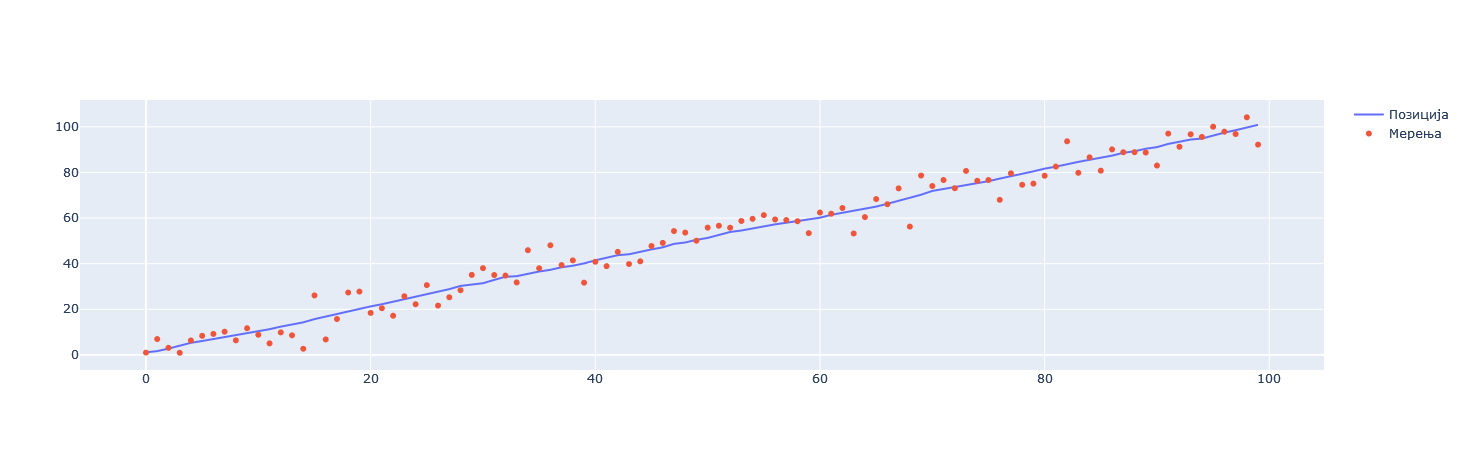

In [71]:
r = Robot()
position_h, measurement_h = r.simulate(steps=100, measurement_noise=5)
fig = go.Figure()
fig.add_scatter(y=position_h, name='Позиција')
fig.add_scatter(y=measurement_h, name='Мерења', mode='markers')

In [3]:
def run_kalman_filter(measurements, belief, A, B, u, R, C, Q):
    """
    Runs a Kalman filter for a given array of measurement.
    
    Args:
        measurements: an array of measurements
        belief: the initial belief
        A: state transition matrix
        B: control input matrix
        u: control input
        R: process noise matrix
        C: measurement matrix
        Q: measurement noise matrix
    
    Returns:
        The history of the belief at every time step.
    """
    history = []    
    for z in measurements:
        prediction = predict(belief, A, B, u, R)
        belief = update(prediction, sp.Matrix([z]), C, Q)
        history.append(belief)
    return history

## Решение

In [63]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('33LSQFVRnR4')